In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import utils.paths as path
import utils.data_cleaning
import missingno

In [156]:
data_dir = path.make_dir_function('data')

In [157]:
df_hurtos = pd.read_csv(data_dir('pre_process','hurtos.csv'),sep=',')
#nuevo df sin columnas innecesarias
df = df_hurtos.copy()
df.drop(['DIRECTORIO', 'NRO_ENCUESTA', 'SECUENCIA_ENCUESTA', 'SECUENCIA_P',
       'ORDEN', 'FEX_C','municipio'],axis=1,inplace=True)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16256 entries, 0 to 16255
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   mes_ultimo_unico_robo      16256 non-null  object
 1   metodo                     16256 non-null  object
 2   hora                       16111 non-null  object
 3   lugar                      16256 non-null  object
 4   celular                    16256 non-null  object
 5   efectivo_tarjetas          16256 non-null  object
 6   articulos_de_uso_personal  16256 non-null  object
 7   dispositivos               16256 non-null  object
 8   otra_pertenencia           16256 non-null  object
 9   arma_fuego                 13884 non-null  object
 10  arma_blanca                13884 non-null  object
 11  otros_objetos              13884 non-null  object
 12  fuerza_fisica              13884 non-null  object
 13  drogas_sustancias          13884 non-null  object
 14  hizo_l

# Valores faltantes

In [159]:
#numero de valores faltantes
df.ms_tools.number_missing()

78613

### ¿Qué valores faltantes tenemos por cada columna?

In [160]:
df.isnull().sum()

mes_ultimo_unico_robo            0
metodo                           0
hora                           145
lugar                            0
celular                          0
efectivo_tarjetas                0
articulos_de_uso_personal        0
dispositivos                     0
otra_pertenencia                 0
arma_fuego                    2372
arma_blanca                   2372
otros_objetos                 2372
fuerza_fisica                 2372
drogas_sustancias             2372
hizo_llamada                     0
denuncia                         0
lugar_denuncia               11116
autoridad                    11819
razon_denuncia               11116
buena_atencion               12655
razon_de_satisfaccion        14762
razon_no_denuncia             5140
recuperacion_objeto              0
year                             0
dtype: int64

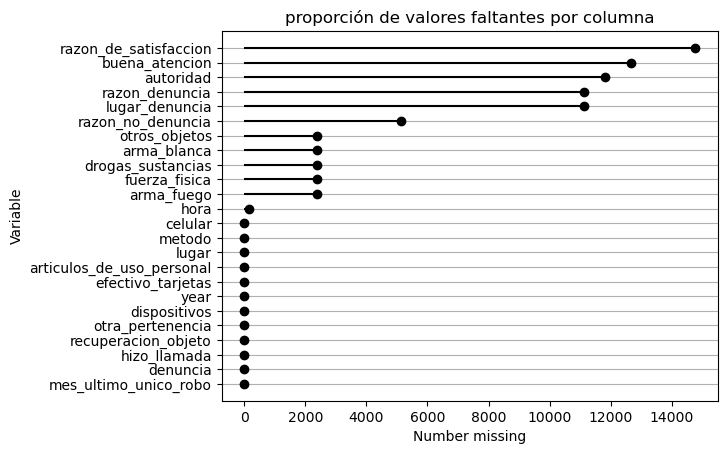

In [161]:
df.ms_tools.vis_variable_plot()
plt.title('proporción de valores faltantes por columna')
plt.show()

# ¿Qué razones pueden haber para que hayan valores faltantes?

<AxesSubplot: >

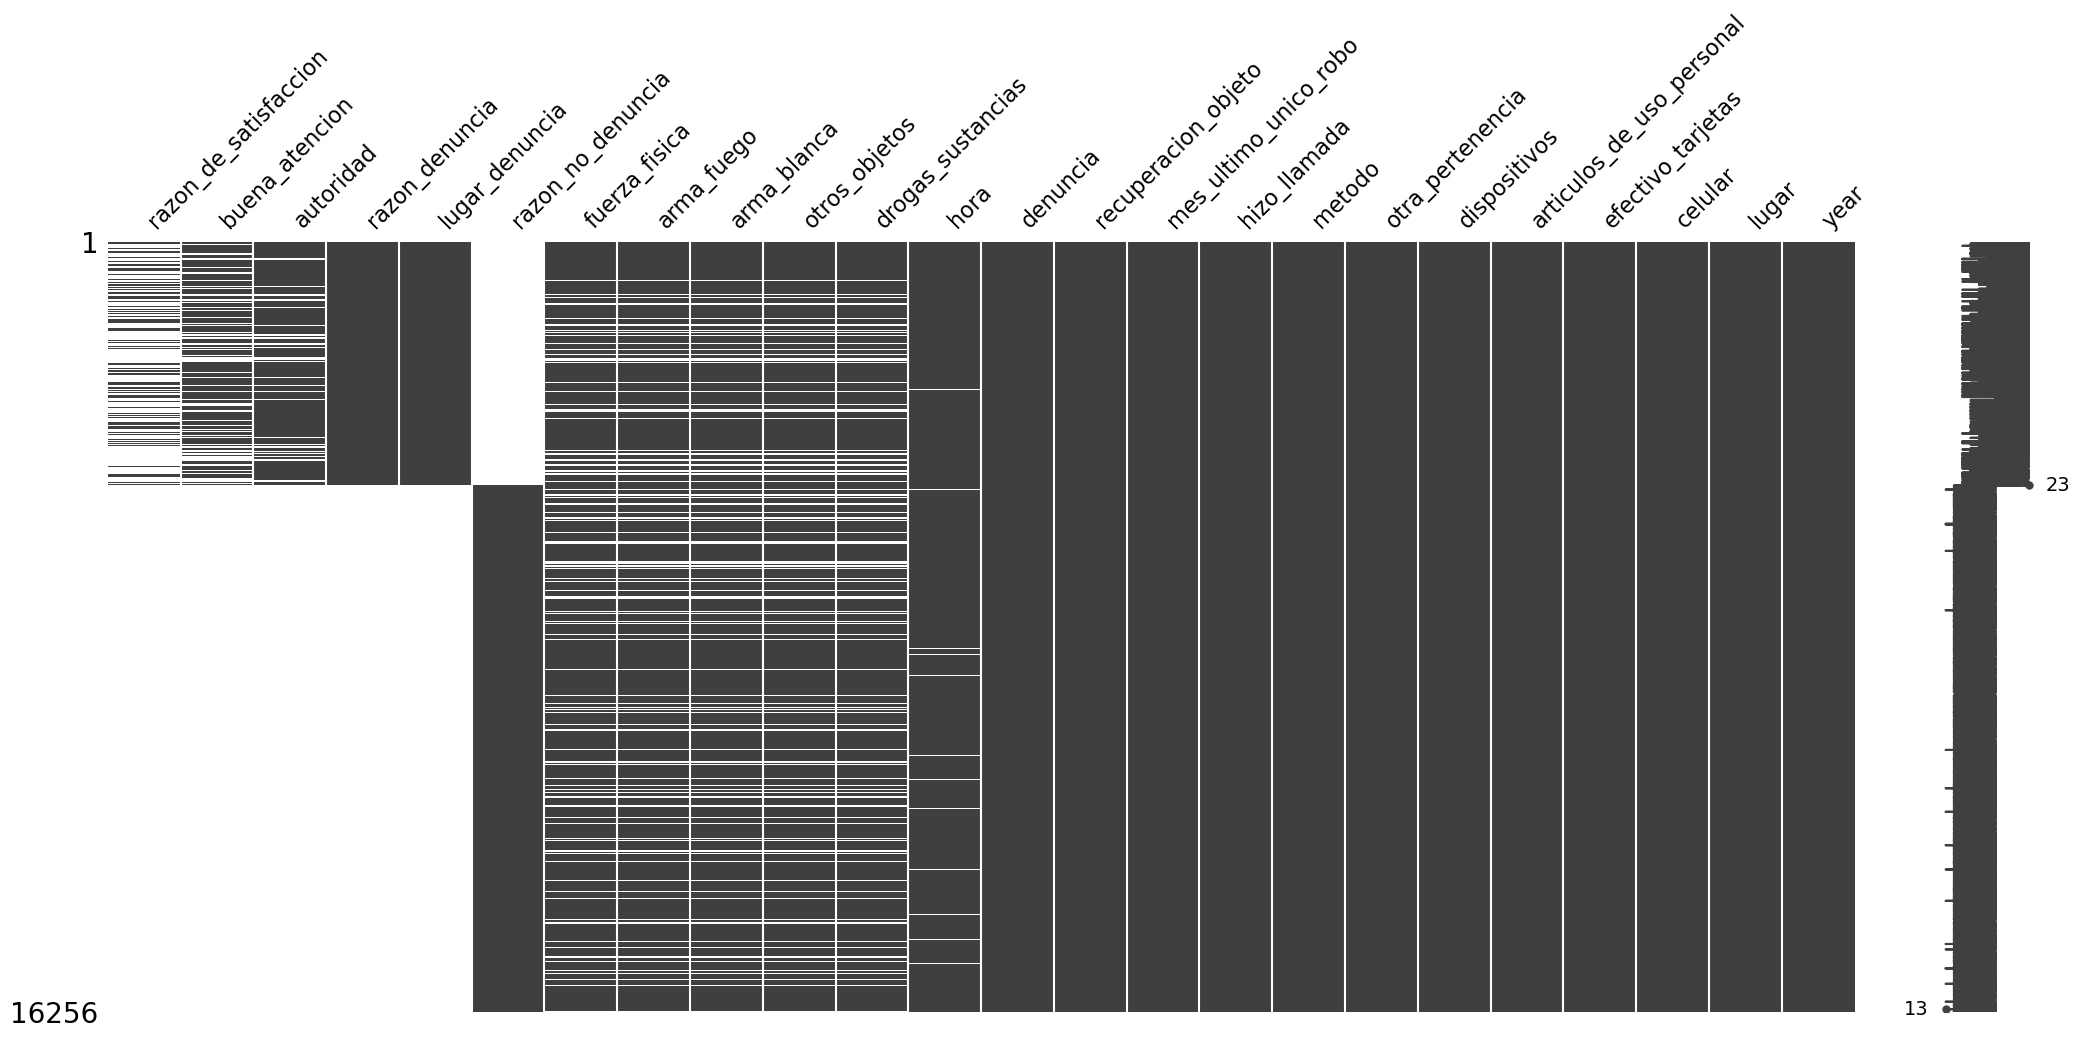

In [162]:
(
    df
    .ms_tools.sort_variables_by_missingness()
    .sort_values(by='razon_denuncia')
    .pipe(missingno.matrix)
)

### Nota:
Al hacer la anterior clasificacion me di cuenta que la falta de tantos valores nulos
dependía de si la persona hizo o no la denuncia.
por consiguiente decido separar a las personas en dos datasets diferentes
en donde se encuentran los que denunciaron y los que no.

In [163]:
df_si_denuncia = df[df['denuncia']=='si']
df_no_denuncia = df[df['denuncia']=='no']

## Valores faltantes en personas que no denunciaron

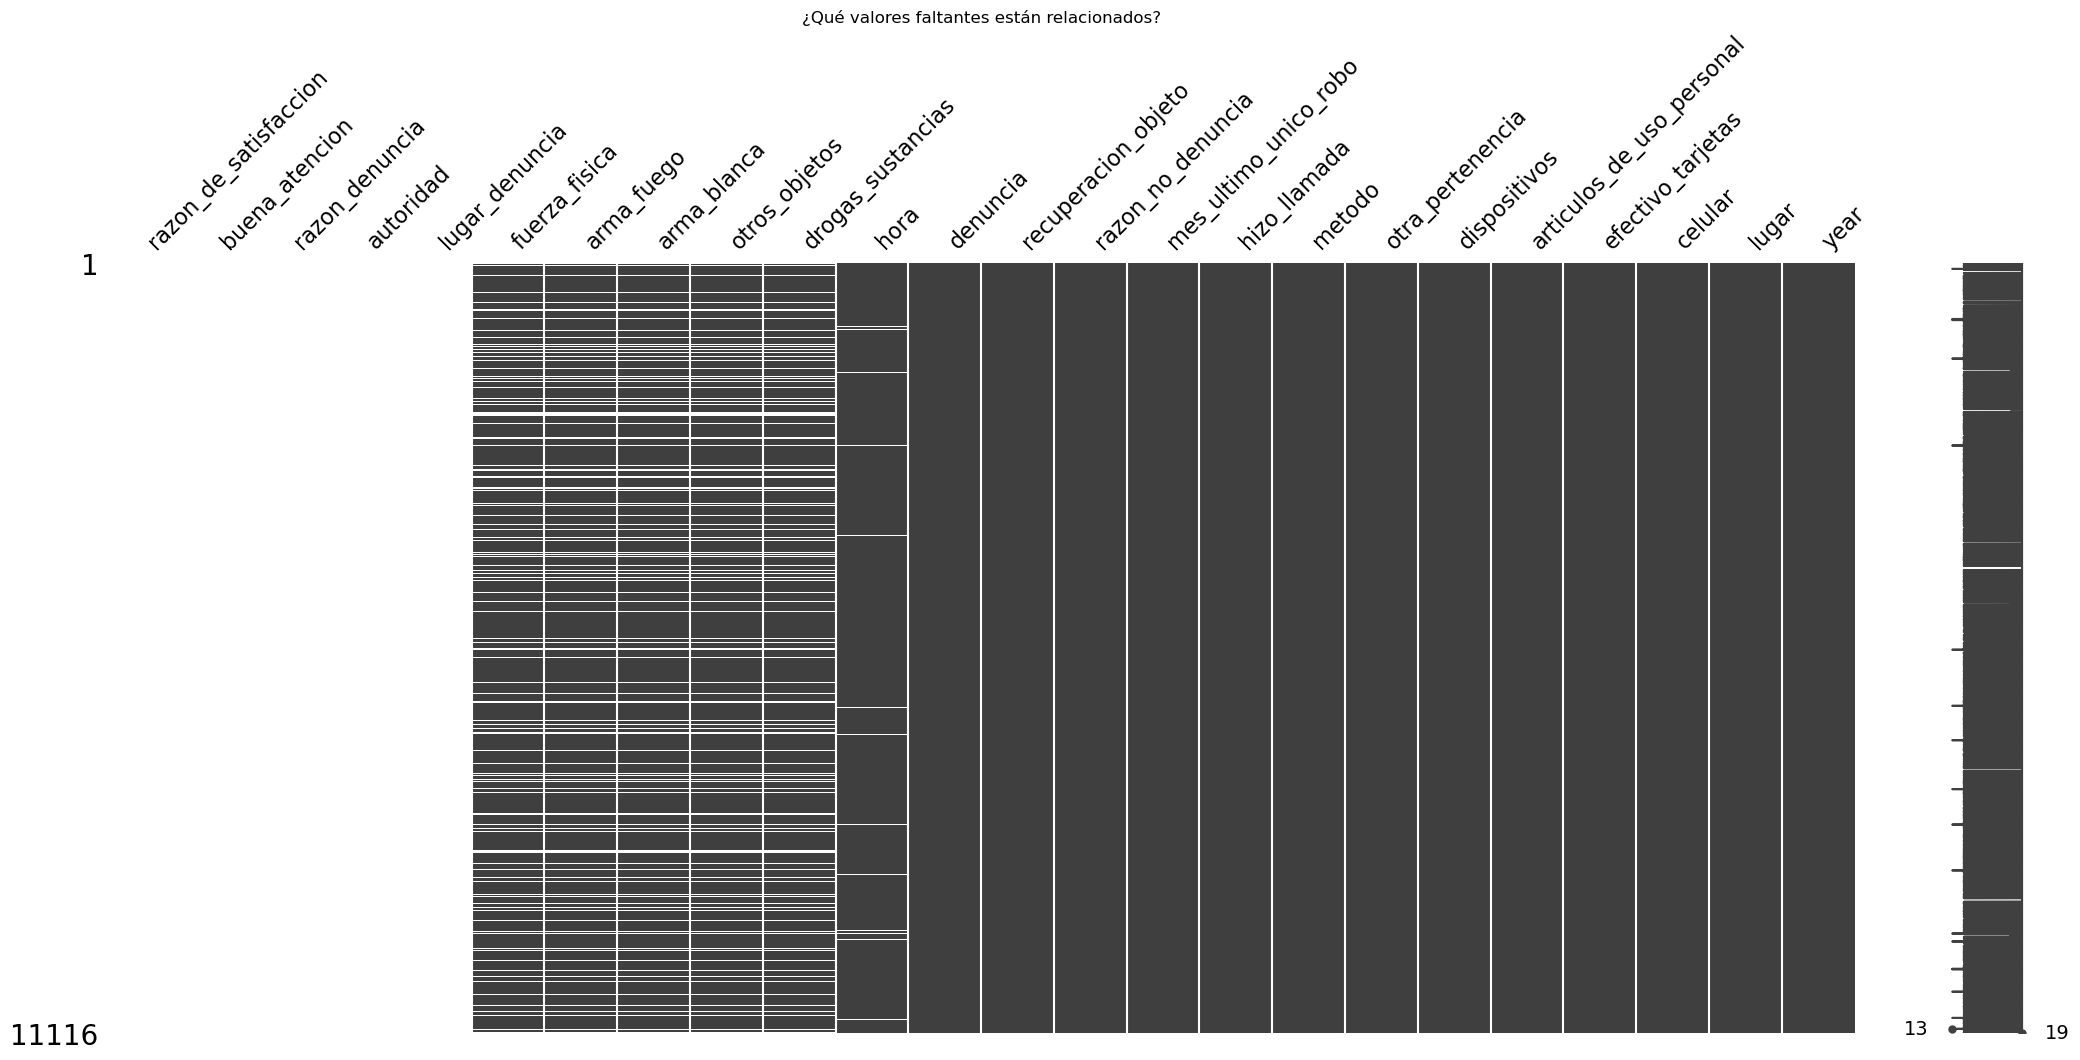

In [164]:
(
    df_no_denuncia
    .ms_tools.sort_variables_by_missingness()
    .sort_values(by='razon_denuncia')
    .pipe(missingno.matrix)
)
plt.title('¿Qué valores faltantes están relacionados?')
plt.show()

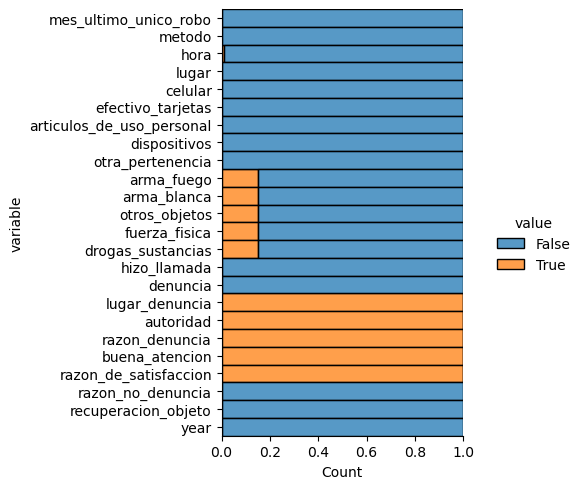

In [165]:
df_no_denuncia.ms_tools.vis_proportion()
plt.show()

### inputación de valores
Debido al conocimiento del contexto, voy a rellenar los valores faltantes
de las personas que no denunciaron por "no denuncia" ya que la falta de estos valores
se deben a esa razón.

In [166]:
values_to_fill = {
    'lugar_denuncia':'no_denuncia',
    'autoridad':'no_denuncia',
    'razon_denuncia':'no_denuncia',
    'buena_atencion':'no_denuncia',
    'razon_de_satisfaccion':'no_denuncia'
    }

In [167]:
df_no_denuncia = df_no_denuncia.fillna(value=values_to_fill)

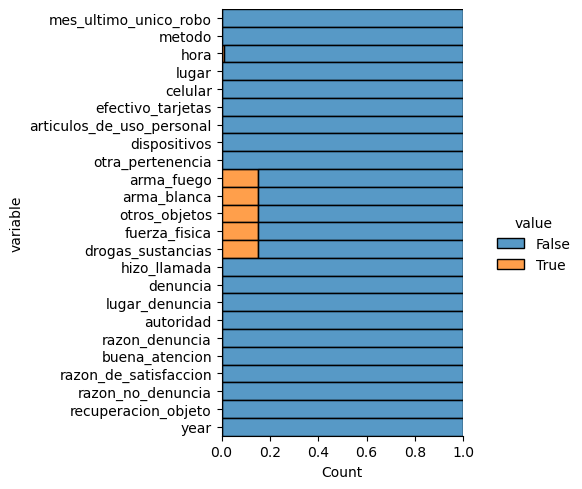

In [168]:
df_no_denuncia.ms_tools.vis_proportion()
plt.show()

## valores nulos para las personas que si denunciaron

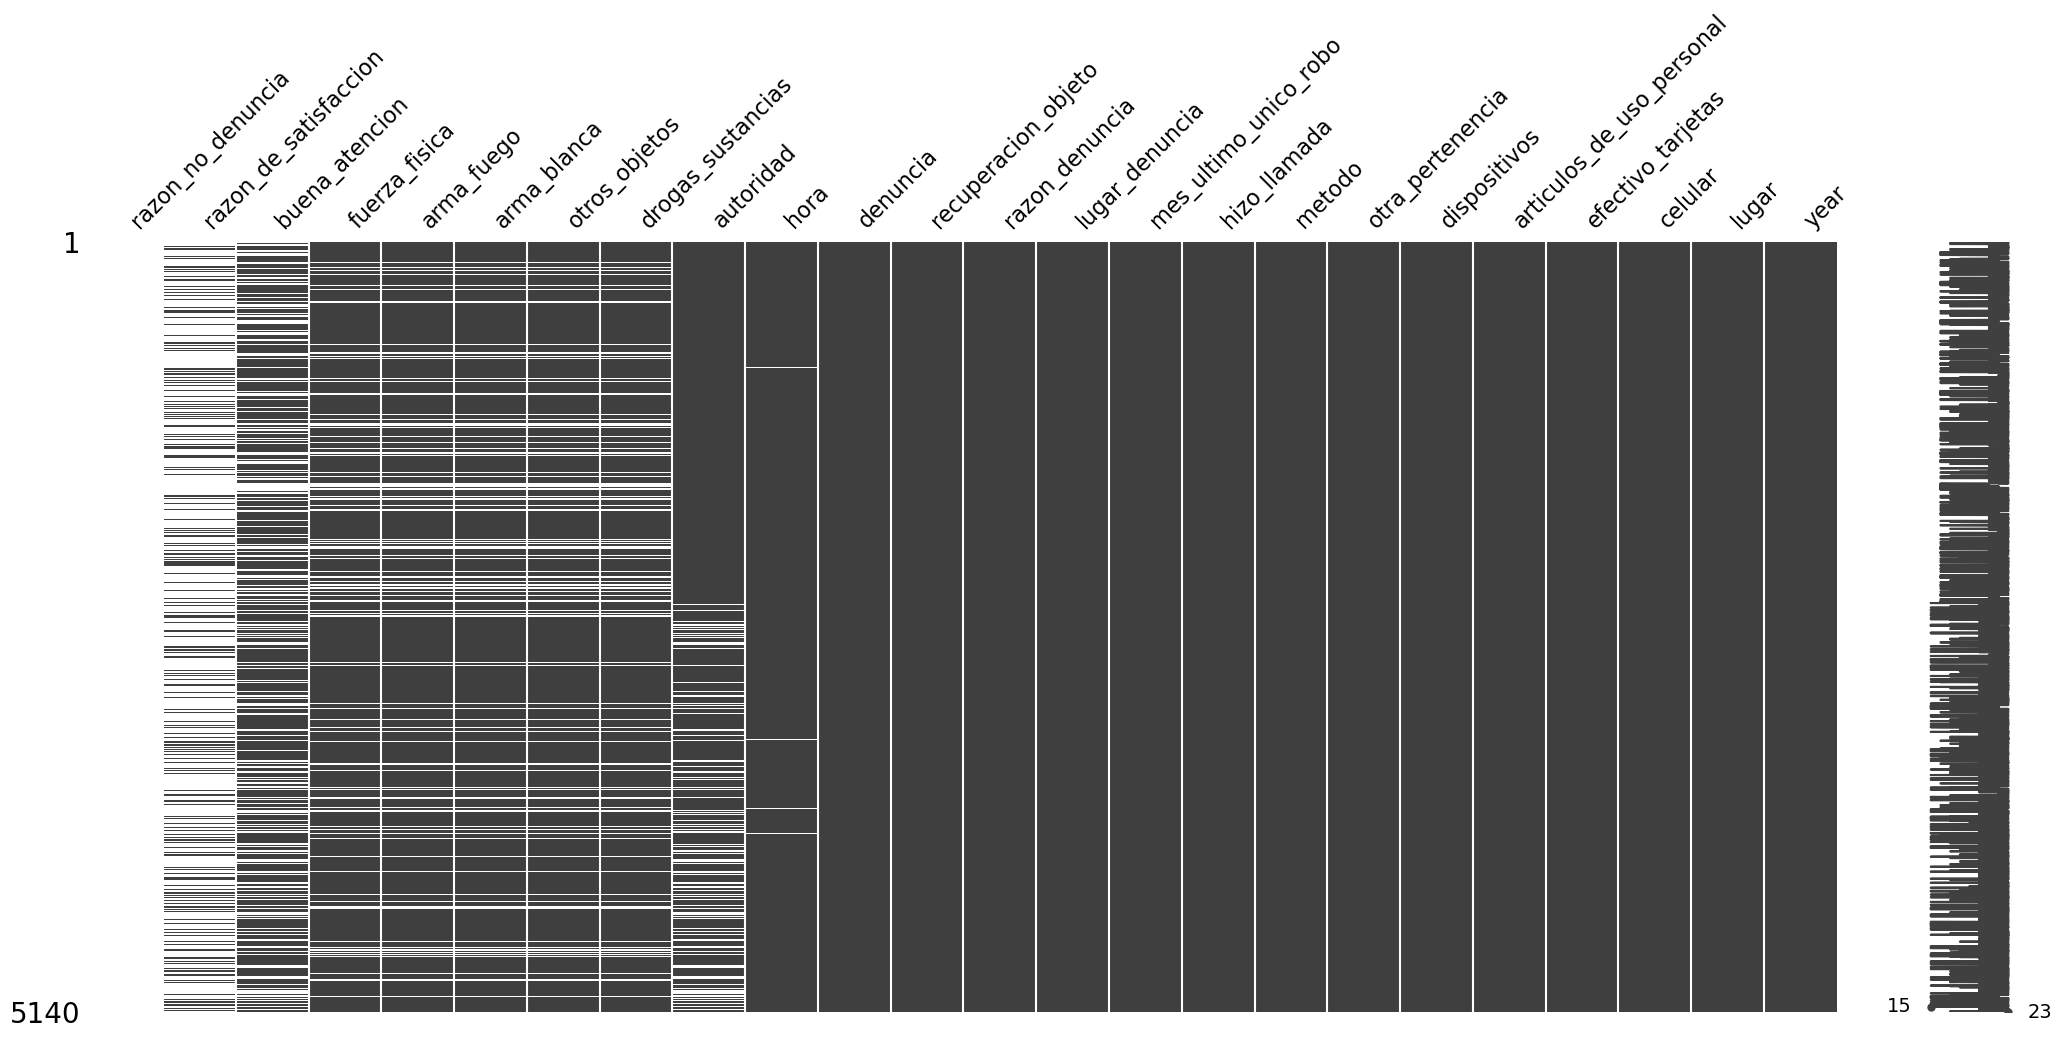

In [169]:
(
    df_si_denuncia
    .ms_tools.sort_variables_by_missingness()
    .sort_values(by='razon_no_denuncia')
    .pipe(missingno.matrix)
)
plt.show()

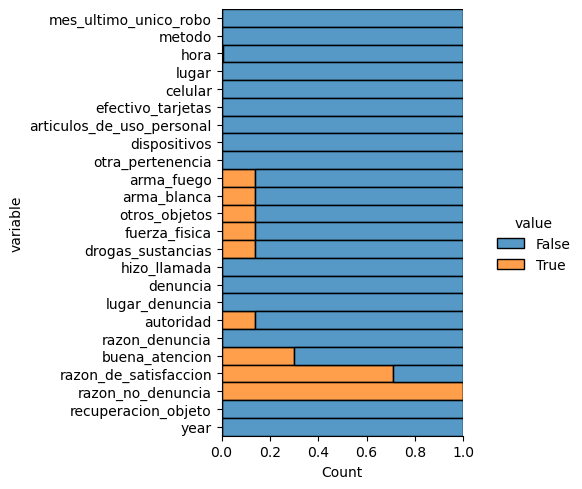

In [170]:
df_si_denuncia.ms_tools.vis_proportion()

### inputación de valores
debido al conocimiento del contexto, voy a rellenar los valores faltantes
de las personas que si denunciaron por "si denuncia" ya que la falta de estos valores
en la columna "razon de la no denuncia" se debe a que estas personas si denunciaron y no 
tenian que responder esta pregunta

In [171]:
df_si_denuncia = df_si_denuncia.fillna(value={'razon_no_denuncia':'si_denuncia'})

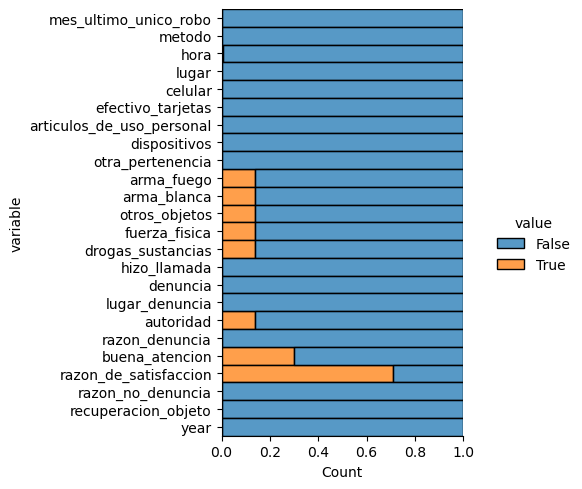

In [172]:
df_si_denuncia.ms_tools.vis_proportion()

# Nuevo DataFrame sin esos valores nulos

In [173]:
new_df = pd.concat([df_no_denuncia,df_si_denuncia])

In [174]:
#veamos que si tengan los mismos datos
print(df.shape,new_df.shape,sep='\n')

(16256, 24)
(16256, 24)


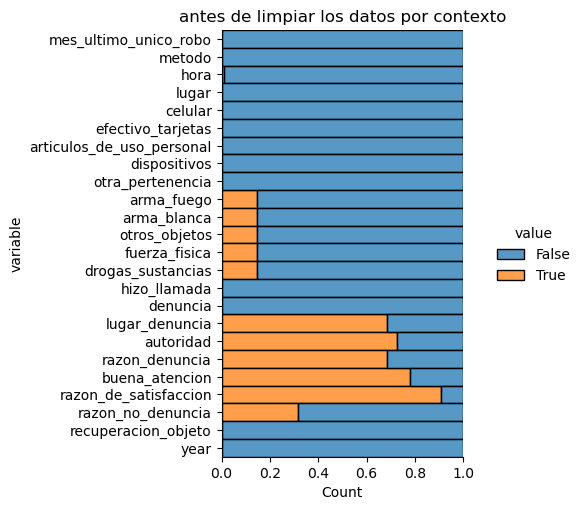

In [175]:
df.ms_tools.vis_proportion()
plt.title("antes de limpiar los datos por contexto")
plt.show()

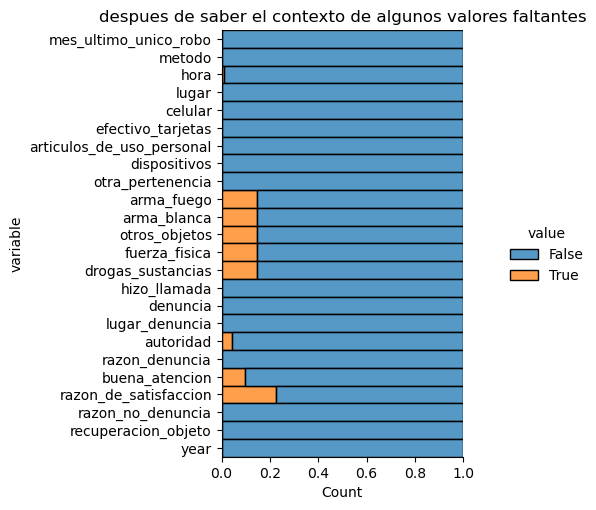

In [176]:
new_df.ms_tools.vis_proportion()
plt.title("despues de saber el contexto de algunos valores faltantes")
plt.show()

In [177]:
new_df.ms_tools.table_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,mes_ultimo_unico_robo,0,16256,0.000000
1,metodo,0,16256,0.000000
2,hora,145,16256,0.891978
3,lugar,0,16256,0.000000
4,celular,0,16256,0.000000
5,efectivo_tarjetas,0,16256,0.000000
6,articulos_de_uso_personal,0,16256,0.000000
7,dispositivos,0,16256,0.000000
8,otra_pertenencia,0,16256,0.000000
9,arma_fuego,2372,16256,14.591535


## ¿Qué factores existen para que falten valores en los objetos que utilizaron en el hurto?:

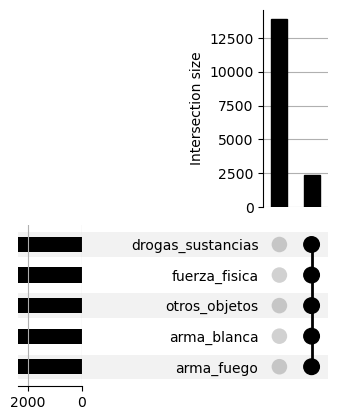

In [178]:
new_df.ms_tools.vis_upsetplot(variables=['arma_fuego', 'arma_blanca', 'otros_objetos',
       'fuerza_fisica', 'drogas_sustancias'])
plt.show()

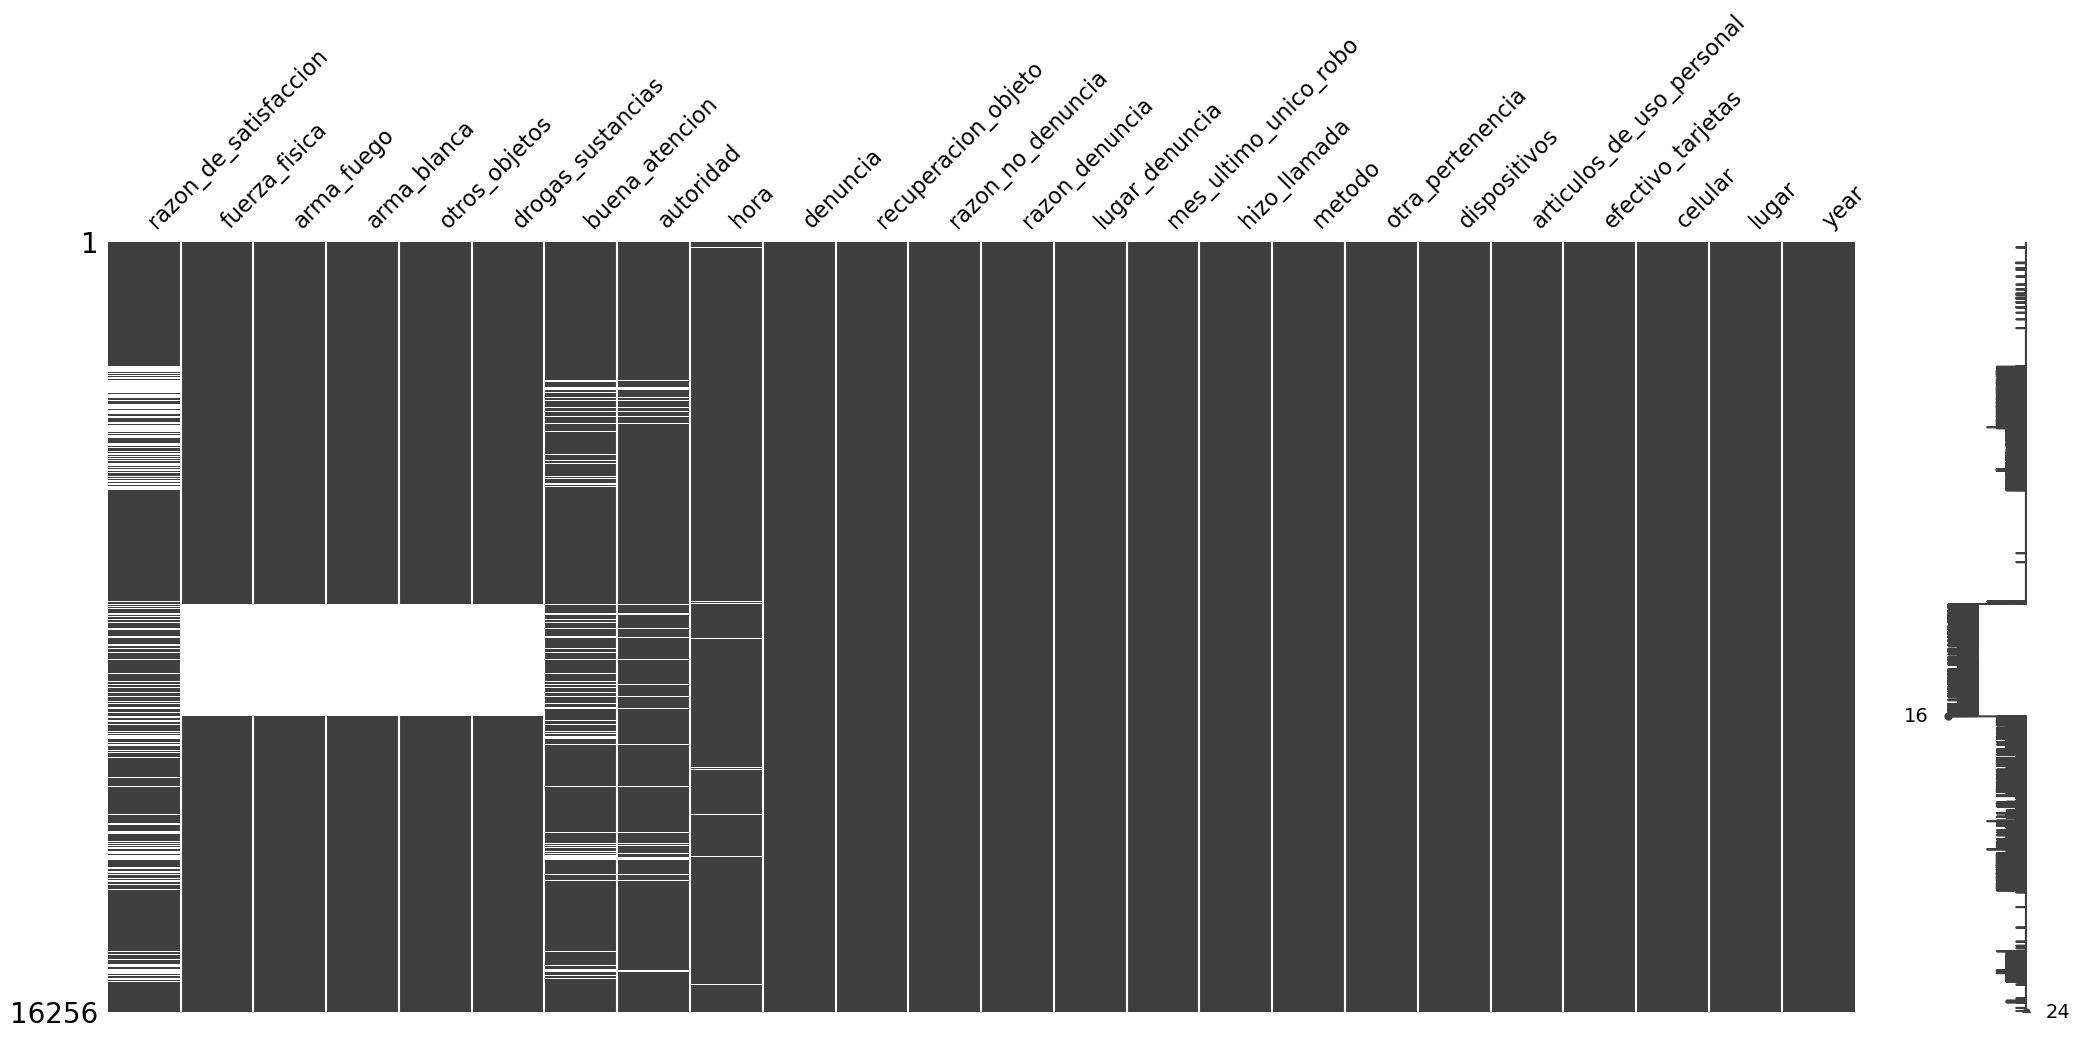

In [179]:
(
    new_df
    .ms_tools
    .sort_variables_by_missingness()
    .sort_values(by='metodo')
    .pipe(missingno.matrix)
)
plt.show()

In [180]:
df_metodo_nulos = new_df[new_df.arma_fuego.isnull()]
df_metodo_nulos.metodo.unique()

array(['cosquilleo'], dtype=object)

### Conclusiones:
Vemos que los valores faltantes de los objetos utilizados para el robo son debido al metodo
de hurto en este caso cosquilleo, por lo cual las victimas no pudierón responder a esta pregunta.
Sin embargo y sabiendo el contexto del metodo de robo, decido imputar el valor "no" en todas las columnas
ya que este metodo no implica ninguna de estas armas u objetos para robar.

In [181]:
new_df = new_df.fillna(value={
    'arma_fuego':'no',
    'arma_blanca':'no',
    'otros_objetos':'no',
    'fuerza_fisica':'no',
    'drogas_sustancias':'no'
    })

## Que puede seguir influyendo en los valores nulos?

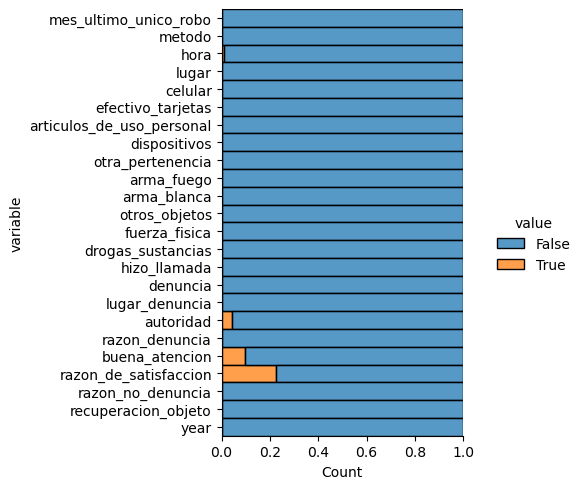

In [182]:
new_df.ms_tools.vis_proportion()

### Lugar donde se denuncia
ya que los valores faltantes tienen que ver con en lugar de denuncia y la satisfacción que recibieron
al denunciar, tal vez sea que las personas no respondieron a esto debido a que lo hicieron a través de
la página web, probemos esta hipotesis

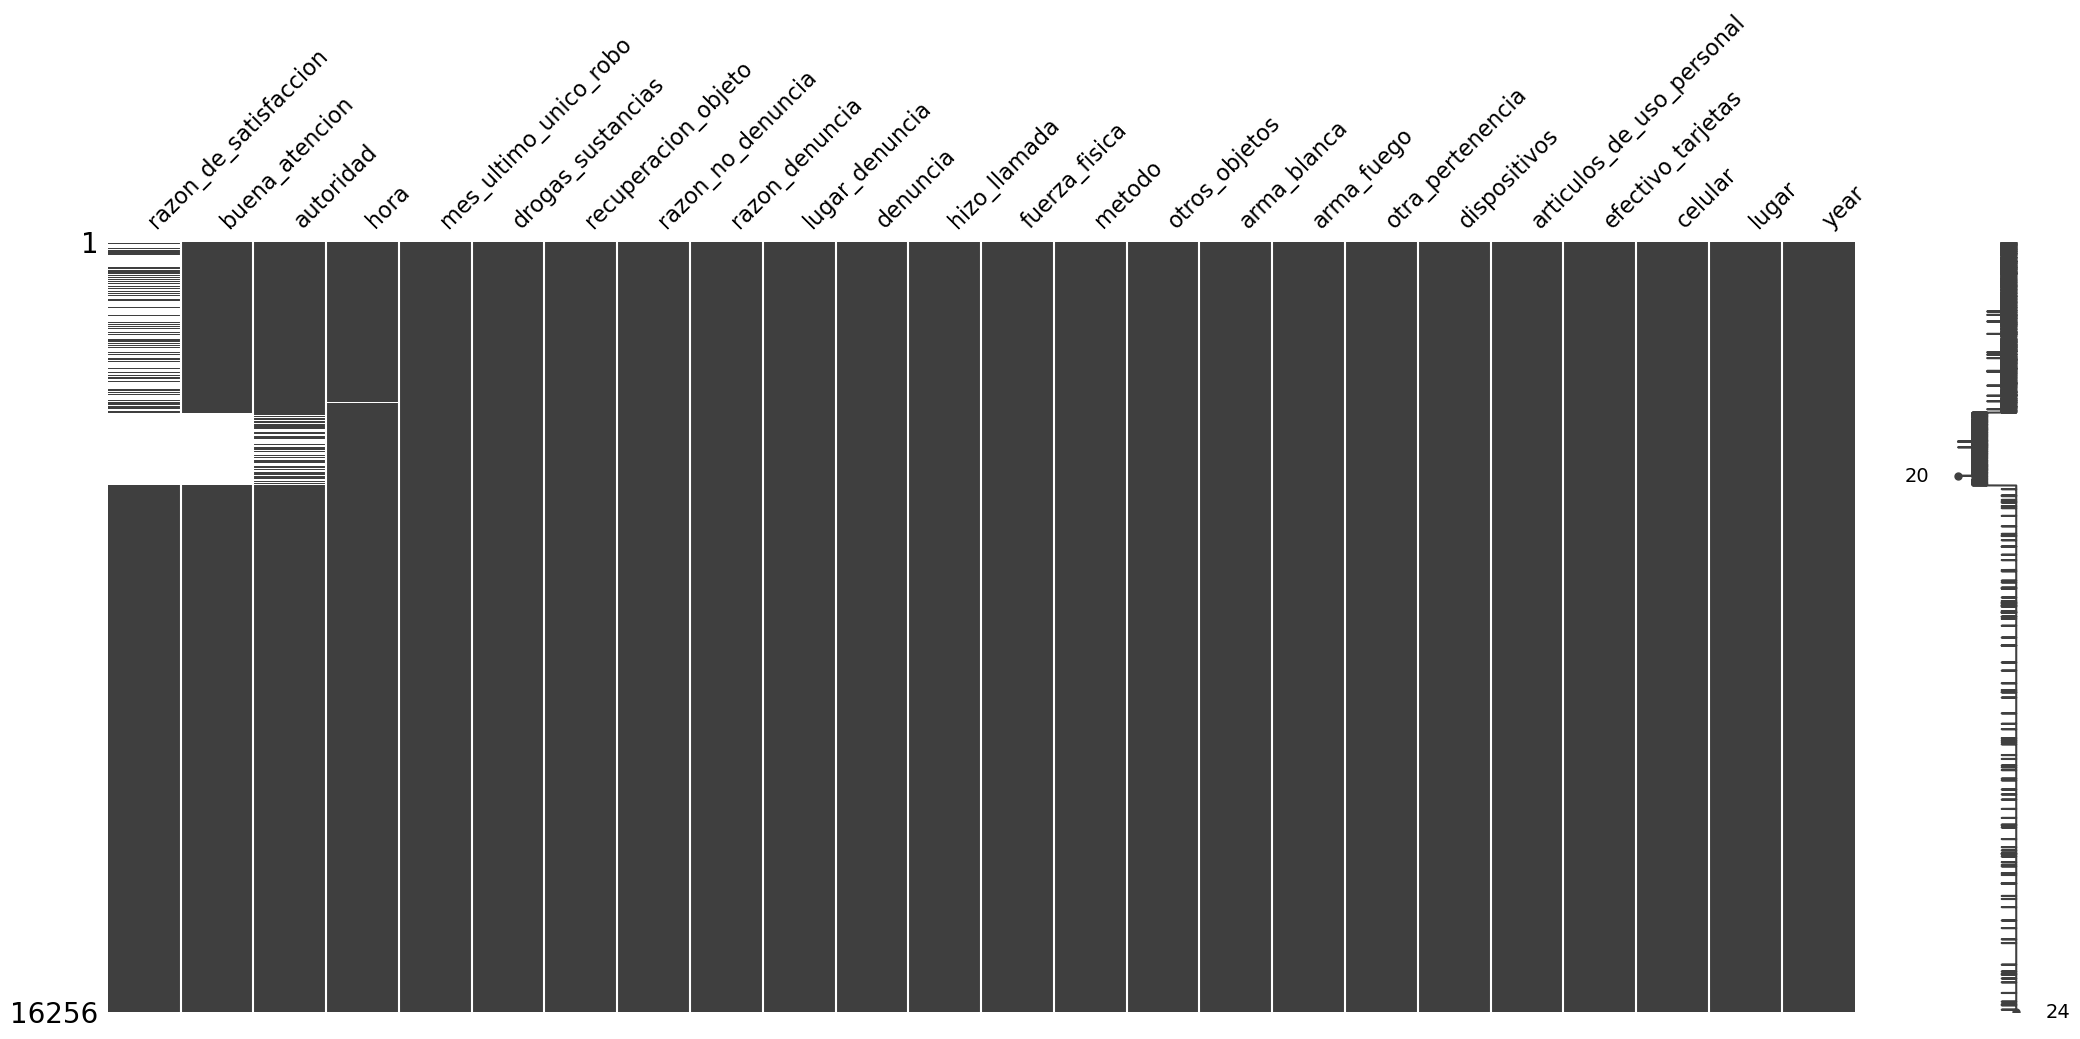

In [183]:
(
    new_df
    .ms_tools
    .sort_variables_by_missingness()
    .sort_values(by='lugar_denuncia')
    .pipe(missingno.matrix)
)
plt.show()

In [184]:
df_1_nulos = new_df[new_df.buena_atencion.isnull()]
df_1_nulos.lugar_denuncia.unique()

array(['denuncias en línea', 'Reporte de objetos perdidos en línea'],
      dtype=object)

In [185]:
df_2_nonulos = new_df[new_df.buena_atencion.notnull()]

In [186]:
print('df_size:',new_df.shape,'df_1_nulos:',df_1_nulos.shape,'df_2_nonulos:',df_2_nonulos.shape,sep='\n')

df_size:
(16256, 24)
df_1_nulos:
(1539, 24)
df_2_nonulos:
(14717, 24)


## Observacion
Comprobamos la hipotesis y los valores faltantes de estos valores se deben a que la denuncia fue presentada
en linea

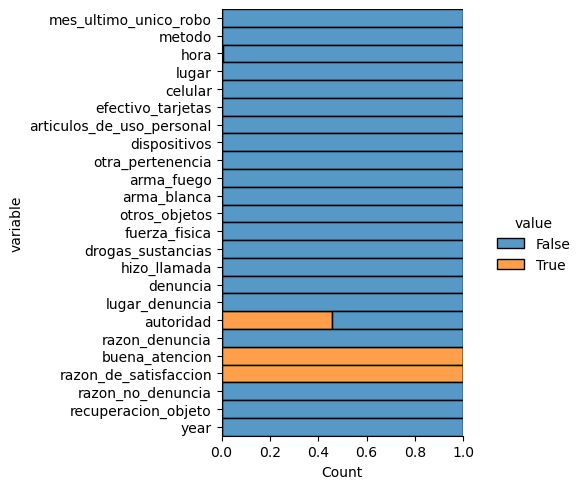

In [187]:
df_1_nulos.ms_tools.vis_proportion()

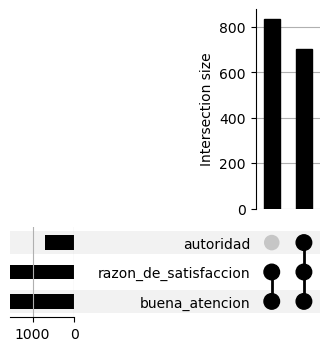

In [188]:
df_1_nulos.ms_tools.vis_upsetplot(variables=['autoridad','buena_atencion','razon_de_satisfaccion'])
plt.show()

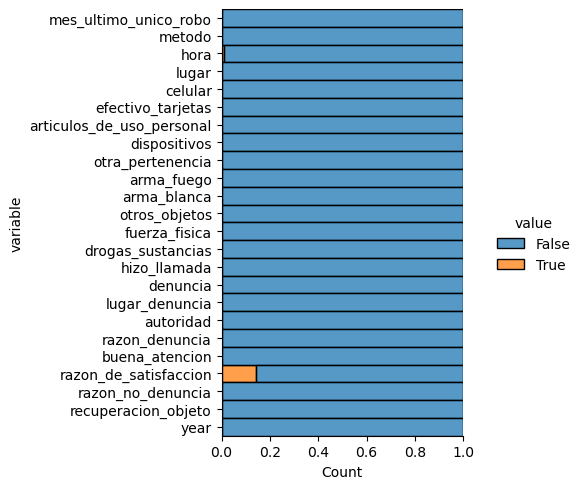

In [189]:
df_2_nonulos.ms_tools.vis_proportion()

#### Inputacion de datos

Vemos que los valores nulos de la razon y denuncia y razon de satisfaccion tienen correlacion con el
lugar donde se hizo la denuncia que es online, por ello rellenare esos valores con "denuncia_online" 

In [190]:
df_1_nulos = df_1_nulos.fillna(
        value={
            'buena_atencion':'denuncia_online',
            'razon_de_satisfaccion':'denuncia_online'
            }
    )

## Ultimos valores nulos

In [191]:
df_casi_terminado = pd.concat([df_1_nulos,df_2_nonulos])

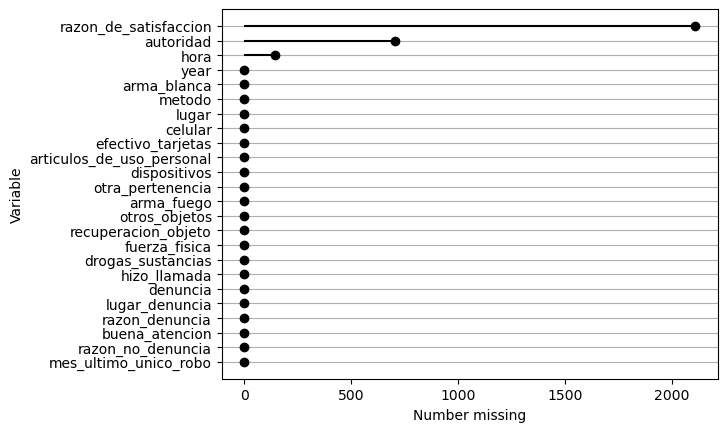

In [231]:
df_casi_terminado.ms_tools.vis_variable_plot()

In [193]:
df_nulosinautoridad = df_casi_terminado[df_casi_terminado['autoridad'].isnull()]

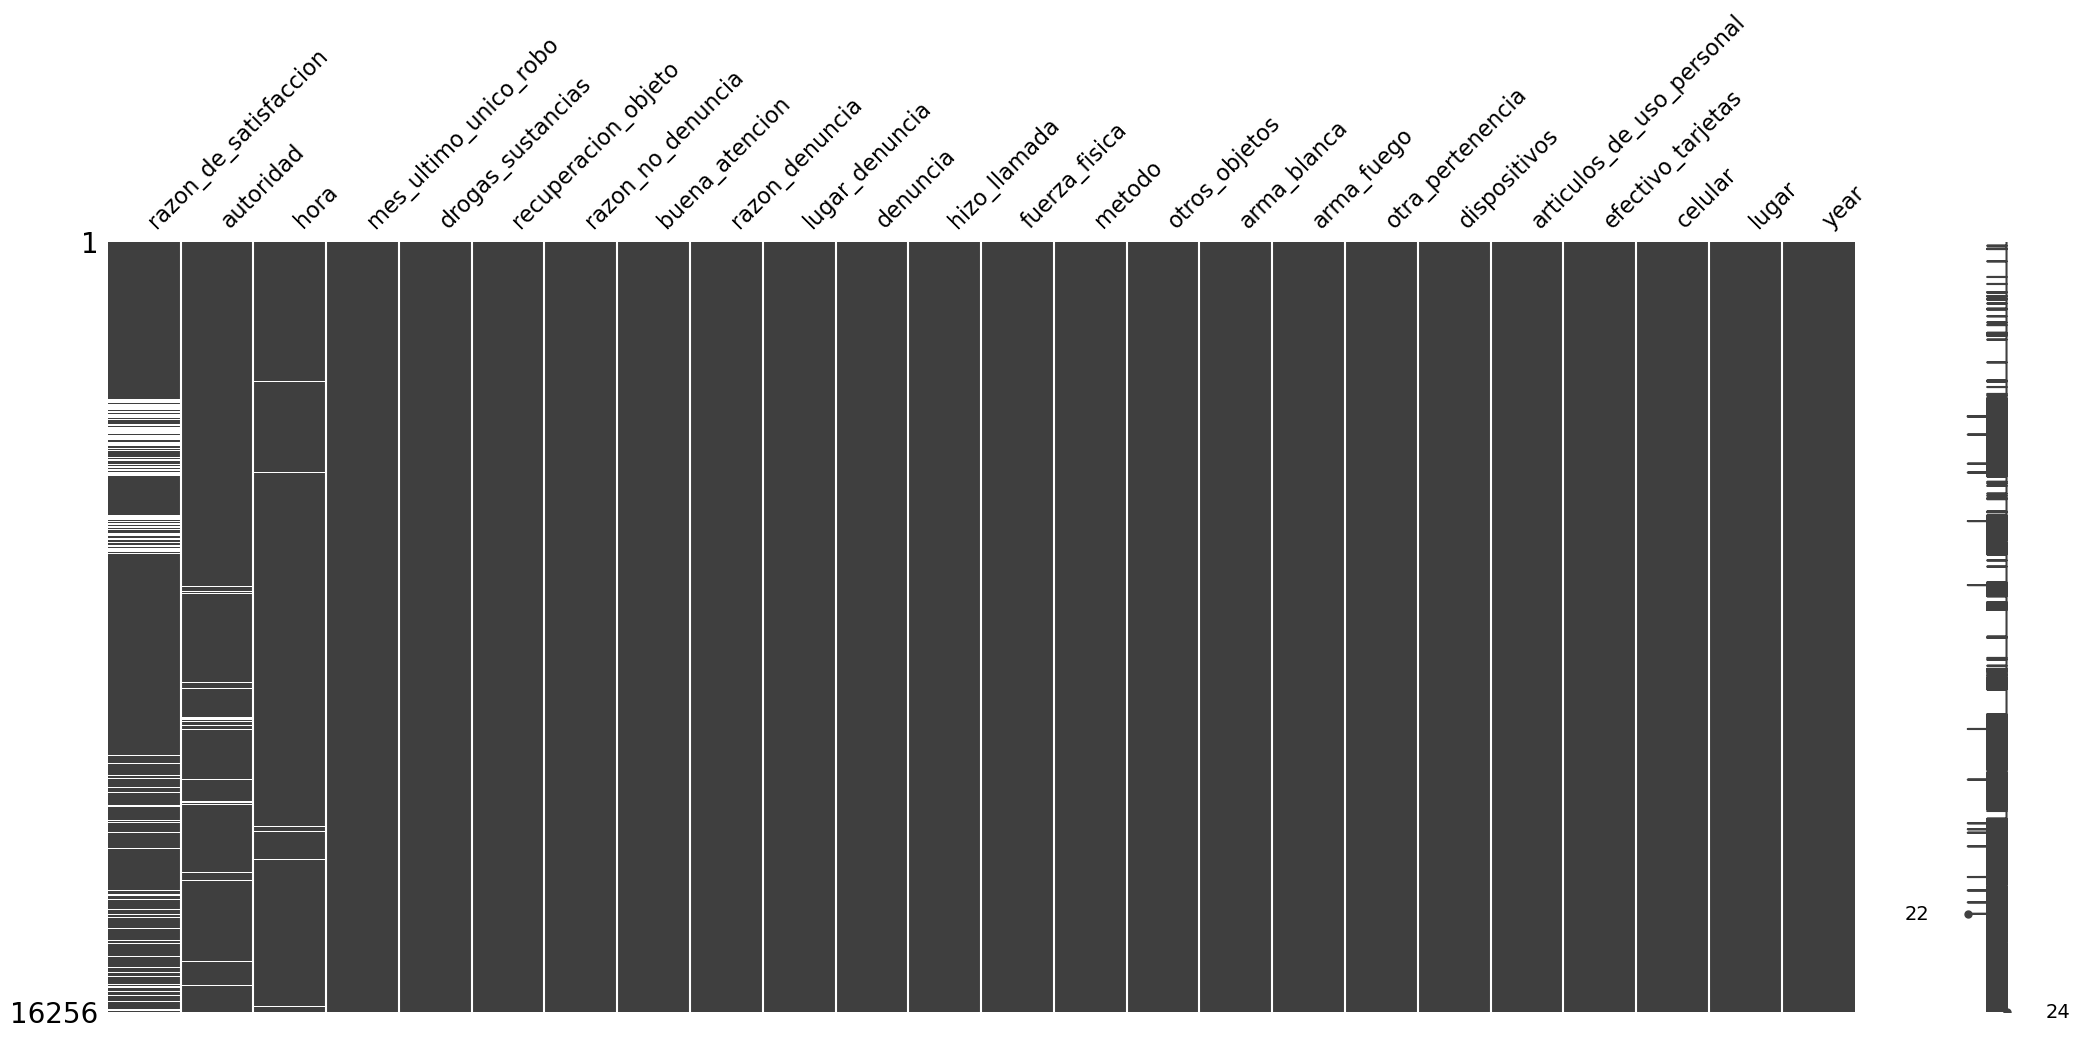

In [230]:
(
    df_casi_terminado
    .ms_tools
    .sort_variables_by_missingness()
    .sort_values(by='lugar')
    .pipe(missingno.matrix)
)
plt.show()

# Exportacion dataset

In [232]:
df_processed = df_casi_terminado

In [233]:
df_processed.isnull().sum()

mes_ultimo_unico_robo           0
metodo                          0
hora                          145
lugar                           0
celular                         0
efectivo_tarjetas               0
articulos_de_uso_personal       0
dispositivos                    0
otra_pertenencia                0
arma_fuego                      0
arma_blanca                     0
otros_objetos                   0
fuerza_fisica                   0
drogas_sustancias               0
hizo_llamada                    0
denuncia                        0
lugar_denuncia                  0
autoridad                     703
razon_denuncia                  0
buena_atencion                  0
razon_de_satisfaccion        2107
razon_no_denuncia               0
recuperacion_objeto             0
year                            0
dtype: int64

In [234]:
df_processed.to_csv(
    path_or_buf=data_dir("processed","hurtos_processed.csv"),
    index=False,
    sep=','
)